# GDP and Life Expectancy

## Table of Contents
- [Introduction](#intro)
- [Goals](#goals)
- [Data](#Data)
    - [Loading the data](#section1_1)
    - [Data Information](#section1_2)
- [Data Cleaning](#dc)
- [Exploratory Data Analysis](#EDA)
    - [Distribution of Life Expectancy and GDP](#section2_1)
    - [Average Life Expectancy](#section2_2)
    - [Life Expectancy Over Time](#section2_3)
    - [GDP Over Time](#section2_4)
    - [Correlation Between GDP and Life Expectancy](#section2_5)
- [Conclusion](#Conclusion)

## Introduction <a class="anchor" id="intro"></a>
The Gross Domestic Product and Life Expectancy are widely used metrics in the field of Economics. [_Gross Domestic Product_](https://www.imf.org/external/pubs/ft/fandd/basics/gdp.htm), also known as _GDP_, is the standard measure of the value added created through the production of goods and services in a country during a specific period. GDP is a commonly used metric for the economic growth of a country.  [Life Expectancy](https://ourworldindata.org/life-expectancy-how-is-it-calculated-and-how-should-it-be-interpreted) refers to the number of years that a person can expect to live. This is calculated by finding the estimate of the the average length of time for a hypothetical group of individuals, from their birth to their death. Life expectancy describes the mortality pattern at one point in time, which is usually a year.

In this project, the following research questions will be addressed:
- What is the distribution of GDP and life expectancy of each countries?
- Which country have the highest and the lowest average GDP and average life expectancy? 
- Has life expectancy in these countries increased over time?
- Has GDP in these countries increased over time?
- Is there a correlation between GDP and life expectancy of a country?

To answer these questions, various visualizations will be used, followed by the analysis.

## Goals <a class="anchor" id="Goals"></a>

The goal of this project is to analyze the relationship between GDP and life expectancy of the countries included in the dataset. 

## Data <a class="anchor" id = "data" ></a> 

The data used in this analysis was sourced from the Codeacademy website as part of Data Science: Analytics Specialist Career Path.

#### Loading the Data <a class="anchor" id = "section1_1" ></a> 

In [19]:
#Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'whitegrid')

In [20]:
#Load the data
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [22]:
data.describe(include = 'all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.00,96.00,96.00
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.50,72.79,3880498570768.40
std,NaN,4.63,10.67,5197561310975.92
min,NaN,2000.00,44.30,4415702800.00
25%,NaN,2003.75,74.47,173301750000.00
50%,NaN,2007.50,76.75,1280220000000.00
75%,NaN,2011.25,78.90,4067510000000.00


#### Data Information  <a class="anchor" id = "section1_2" ></a>

The dataset provided has the following columns of data:

- __Country__ - nation
- __Year__ - the year for the observation
- __Life expectancy at birth (years)__ - life expectancy value in years
- __GDP__ - Gross Domestic Product (in USD billions)

As shown in the summary statistics, there are a total of 96 observations from 6 countries. 

In [23]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [24]:
data.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

### Data Cleaning <a class="anchor" id="dc"></a>
   Since the dataset have no missing values, there was no need to clean the data. I will only rename the column `Life expectancy at birth (years)` and change it to `Life Expectancy` to make it shorter.

In [25]:
#Data Cleaning
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data = data.rename({'Life expectancy at birth (years)': 'Life expectancy'}, axis = 'columns')
data.head(10)


,Country,Year,Life expectancy,GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00
5,Chile,2005,78.40,122965000000.00
6,Chile,2006,78.90,154788000000.00
7,Chile,2007,78.90,173606000000.00
8,Chile,2008,79.60,179638000000.00
9,Chile,2009,79.30,172389000000.00


## Exploratory Data Analysis
<a class="anchor" id="EDA"></a>

For the Exploratory Data Analysis, the following research questions will be addressed:
- What is the distribution of GDP and life expectancy of each countries?
-  Which country have the highest and the lowest average GDP and average life expectancy? 
- Has life expectancy in these countries increased over time?
- Has GDP in these countries increased over time?
- Is there a correlation between GDP and life expectancy of a country?

###  Distribution of Life Expectancy and GDP <a class="anchor" id="section2_1"></a>

This section aims to answer the question:

    What is the distribution of GDP and life expectancy of each countries?
    
To do that, the data will be visualized using a strip plot and violin plot to identify the shape of the distribution. 

A Violin Plot is used to visualise the distribution of the data and its [probability density](https://en.wikipedia.org/wiki/Probability_density_function) while a strip plot is used to visualize the distribution of many one-dimensional values (plotted as dots).

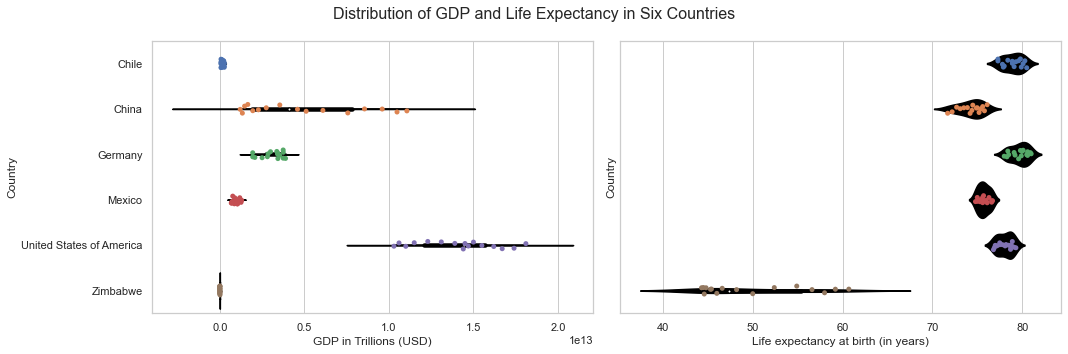

<Figure size 432x288 with 0 Axes>

In [26]:
#Visualize destibution of GDP using strip and violin plot
fig, axes = plt.subplots(1,2, sharey=True, figsize = (15, 5))

axes[0] = sns.violinplot(ax=axes[0], data = data, x = 'GDP', y = 'Country', color = 'black')
axes[0] = sns.stripplot(ax=axes[0], data = data, x = 'GDP', y = 'Country', palette = 'deep')
axes[0].set_xlabel("GDP in Trillions (USD)")

#Visualize destibution of Life expectancy using strip and violin plot
axes[1] = sns.violinplot(ax=axes[1], data = data, x = 'Life expectancy', y = 'Country', color = 'black')
axes[1] = sns.stripplot(ax=axes[1], data = data, x = 'Life expectancy', y = 'Country', palette = 'deep')
axes[1].set_xlabel("Life expectancy at birth (in years)")

fig.suptitle('Distribution of GDP and Life Expectancy in Six Countries', fontsize = 16)
plt.tight_layout()
plt.show()
plt.clf()

###### Analysis
   On the `GDP` graph, China have the widest range of distribution among the six countries, followed by United States. Zimbabwe, Chile, and Mexico on the other hand, have a shorter range of distributions. As for the `life expectancy` graph, Zimbabwe have the widest range of distribution. 

### Average GDP and Average Life Expectancy <a class="anchor" id="section2_2"></a>
This section aims to answer the question:

    Which country have the highest and the lowest average GDP and average life expectancy? 

The average GDP and average life expectancy will first be computed and then visualized using a grouped bar chart.

In [27]:
#Since I'm looking for the mean life expectancy and GDP for each country, I can drop the year column
data_mean = data.drop('Year', axis = 1).groupby('Country').mean().reset_index()
data_mean

,Country,Life expectancy,GDP
0,Chile,78.94,169788845015.31
1,China,74.26,4957713750000.00
2,Germany,79.66,3094775625000.00
3,Mexico,75.72,976650625000.00
4,United States of America,78.06,14075000000000.00
5,Zimbabwe,50.09,9062579595.06


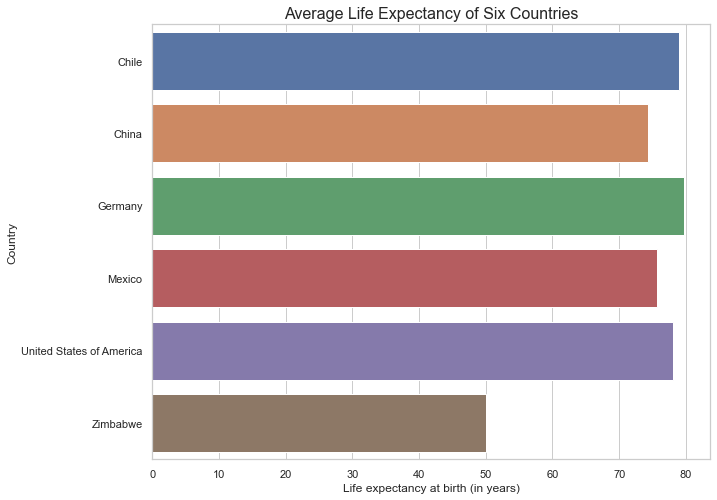

<Figure size 432x288 with 0 Axes>

In [46]:
#Visualize average life expectancy
fig = plt.figure(figsize = (10, 8))
fig.tight_layout()
sns.barplot(x='Life expectancy', y='Country', data=data_mean, orient ='h')
plt.xlabel('Life expectancy at birth (in years)')
plt.title('Average Life Expectancy of Six Countries', fontsize = 16)
plt.show()
plt.clf()

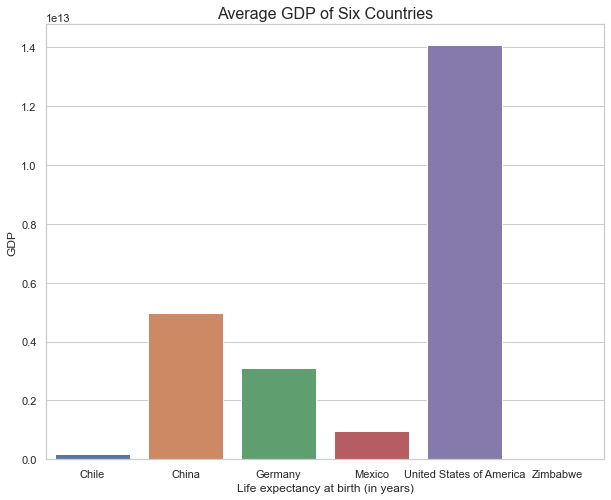

<Figure size 432x288 with 0 Axes>

In [29]:
#Visualize GDP
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Country', y = 'GDP', data = data_mean)
plt.xlabel('Life expectancy at birth (in years)')
plt.title('Average GDP of Six Countries', fontsize = 16)
plt.show()
plt.clf()

###### Analysis
   Based on the Dataframe above, Gemany has the highest average Life expectancy among the six countries, which is 79.656 years in age. Zimbabwe on the other hand has the lowest life expectancy rate, which is 50.094 years in age. In terms of GDP, United States have the highest average GDP, which is approximately 14 trillion(USD). Zimbabwe also have the lowest average GDP, which is approximately 9 billion(USD).

### Life Expectancy Over Time <a class="anchor" id="section2_3"></a>

This section aims to answer the question:

    Has life expectancy in these countries increased over time?

The countries' `GDP` over time will be compared using a line plot.

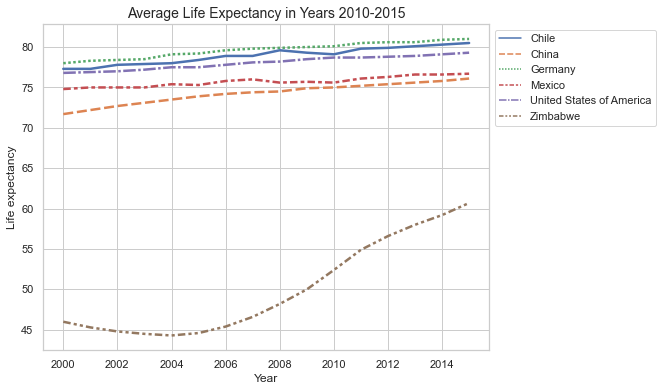

<Figure size 432x288 with 0 Axes>

In [30]:
#Visualize and Compare life expectancy rate of each countries in the dataset
plt.figure(figsize=(8,6))
sns.lineplot(data = data, x='Year', y='Life expectancy', hue='Country', style='Country', linewidth = 2.5)
plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.title('Average Life Expectancy in Years 2010-2015', fontsize=14)
plt.show()
plt.clf()

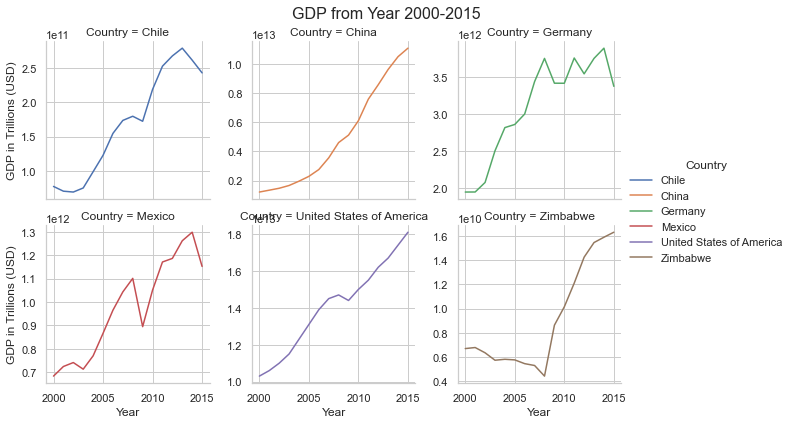

<Figure size 432x288 with 0 Axes>

In [31]:
#Create separate line plot for each countries
avg_life_expectancy = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

avg_life_expectancy = (avg_life_expectancy.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions (USD)"))
avg_life_expectancy.fig.suptitle('GDP from Year 2000-2015', fontsize = 16)
avg_life_expectancy.fig.subplots_adjust(top = 0.9)
plt.show()
plt.clf()

######   Analysis
   The graph shows that the average life expectancy in six countries have relatively increased in a span of 10 years. Zimbabwe, in particular, have shown the highest increase in its life expectancy. The country's life expectancy, however, is still considered below the average (which is 72.79 years).

### GDP Over Time <a class="anchor" id="section2_4"></a>

This section aims to answer the question:

    Has GDP in these countries increased over time?

The GDP and Life expectancy trend will be visusalized using a line plot.

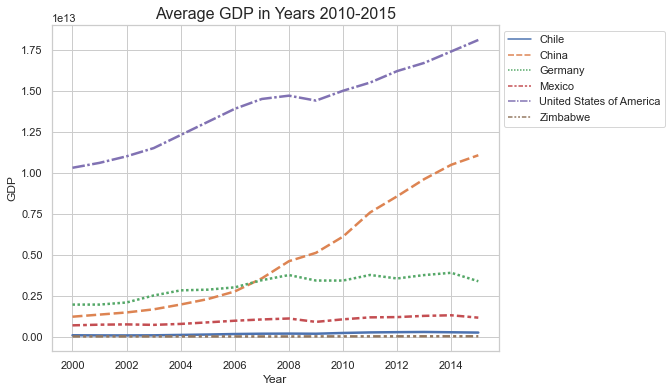

<Figure size 432x288 with 0 Axes>

In [32]:
#Visualize and compare the GDP trend of countries using line plots
plt.figure(figsize=(8,6))
sns.lineplot(data = data, x='Year', y='GDP', hue='Country', style='Country', linewidth=2.5)
plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.title('Average GDP in Years 2010-2015', fontsize=16)
plt.show()
plt.clf()

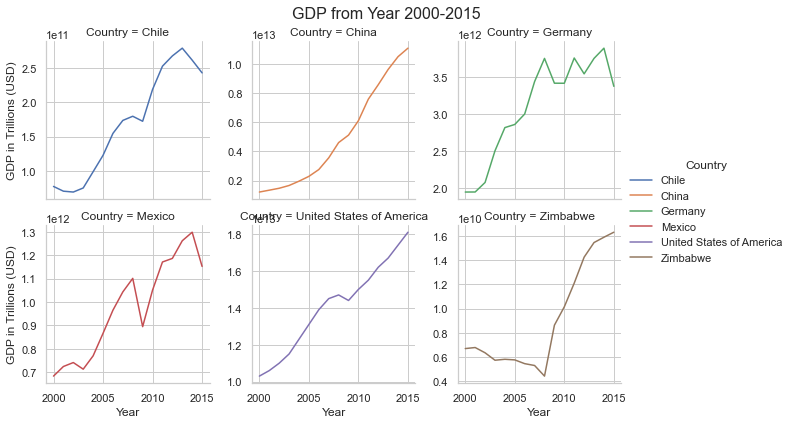

<Figure size 432x288 with 0 Axes>

In [33]:
#Create separate line plot for each countries
ggdp = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

ggdp = (ggdp.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions (USD)"))
ggdp.fig.suptitle('GDP from Year 2000-2015', fontsize = 16)
ggdp.fig.subplots_adjust(top = 0.9)
plt.show()
plt.clf()

###### Analysis
   The figure shows that among the six countries, China has shown the largest and steady growth in its GDP in a span of 10 years. It can also be seen that although US and Germany are both considered as first-world countries, US are more consistent in its economic growth as compared to Germany.

### Correlation between GDP and Life Expectancy <a class="anchor" id="section2_5"></a>

This section aims to answer the question:

    Is there a correlation between GDP and life expectancy of a country?

Since both variables are numerical, I will use a scatterplot to analyze the relationship between these two variables. The x-axis will be the `Life Expectancy` while the y-axis will be the `GDP`.

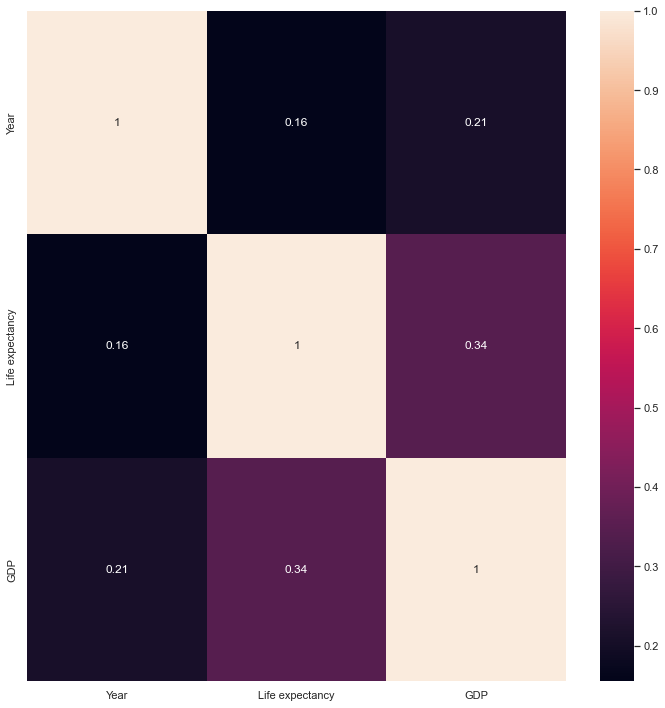

In [34]:
# heat matrix that shows correlation across all numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(),annot=True)
plt.tight_layout()
plt.show()

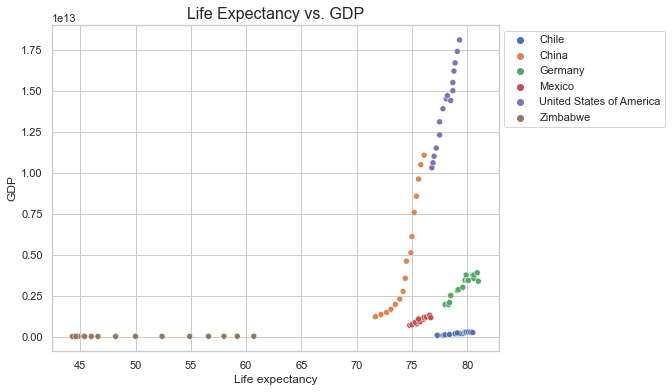

<Figure size 432x288 with 0 Axes>

In [35]:
#Visualize Correlation between GDP and Life Expectancy using scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data = data, x='Life expectancy', y='GDP', hue='Country')
plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.title('Life Expectancy vs. GDP', fontsize=16)
plt.show()
plt.clf()

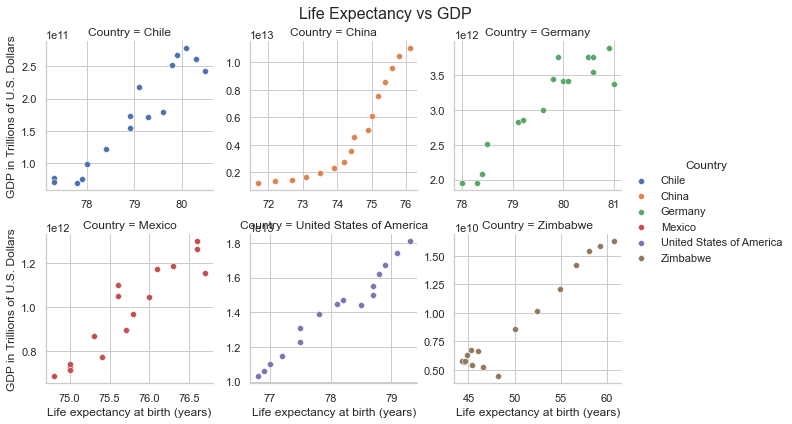

<Figure size 432x288 with 0 Axes>

In [36]:
#Scatterplot of Life vs GDP for each countries in the dataset
g = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
g = (g.map(sns.scatterplot,"Life expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
g.fig.subplots_adjust(top = 0.9)

g.fig.suptitle('Life Expectancy vs GDP', fontsize = 16)
plt.show()
plt.clf()

###### Analysis
The heat map and scatterplots above shows that there is a positive correlation between the countries' `GDP` and it's `Life expectancy`. The correlation between the GDP and Life expectancy is 0.34, which indicates a weakly positive correlation.This indicates that countries with high GDP also tend to have higher life expectancy at birth.

## Conclusion <a class = "anchor" id="conclusion"></a>

The data was able to give an answer to the questions posed on the first part of the Data Vizualization project and subsequently meet the goal for this project. It showed that in the years 2000-2015, the life expectancy has increased over time, particularly in Zimbabwe. It also showed that China have seen the largest growth in its GDP. Lastly, the analysis showed that there is a weakly positive correlation between a country's GDP and its life expectancy at birth.